In [1]:

import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw , Descriptors, AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit.Chem.rdmolops import  PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
# from rdkit.Chem.AllChem import MorganGenerator


In [2]:
df = pd.read_csv('/Users/samuelsetsofia/dev/DTI/BIOSNAP.csv')
df.head()

,SMILES,Target Sequence,Label,sFunction,1,2,3,4,5,6,...,200,201,202,203,204,205,206,207,208,209
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,[OUTPUT] This enzyme may degrade cohesive stru...,4.356094,4.356094,0.709426,0.709426,0.759604,239.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,[OUTPUT] Retinoic acid receptors bind to their...,10.534005,10.534005,0.259688,-0.912324,0.529573,300.442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,[OUTPUT] Catalyzes reduction of carbonyl-conta...,15.171732,15.171732,0.028414,-2.274490,0.195690,778.947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,NaN,10.288871,10.288871,0.207327,-0.628034,0.349961,406.482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,[OUTPUT] The regulatory subunit of the KCNMA1 ...,11.124475,11.124475,0.130320,-0.296192,0.484554,399.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df.drop(df.columns[3:], axis=1)
df

,SMILES,Target Sequence,Label
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0
...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1


In [6]:
df.dropna(inplace=  True)
df.info()
df.to_csv("biosnap.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SMILES           19234 non-null  object
 1   Target Sequence  19234 non-null  object
 2   Label            19234 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 450.9+ KB


In [107]:
df.dropna(inplace=  True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SMILES           19234 non-null  object
 1   Target Sequence  19234 non-null  object
 2   Label            19234 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 450.9+ KB


In [6]:
df['SMILES'].head()

0                      CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1
1      C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O
2    [H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...
3    COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2
4    [H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...
Name: SMILES, dtype: object

[09:30:20] Unusual charge on atom 0 number of radical electrons set to zero
[09:30:20] Unusual charge on atom 0 number of radical electrons set to zero


,SMILES,Target Sequence,Label,mol_obj
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,
...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,

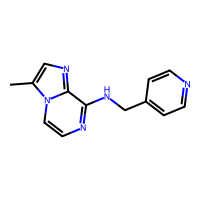
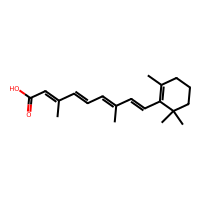
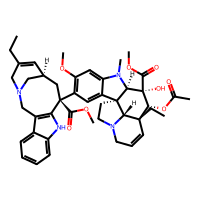
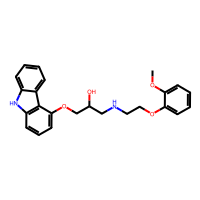
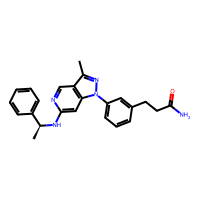
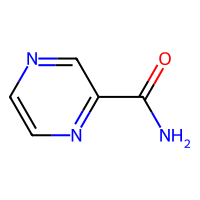
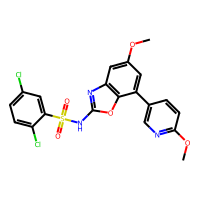
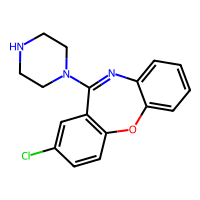
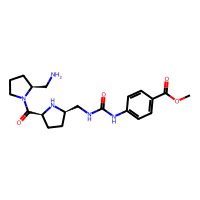
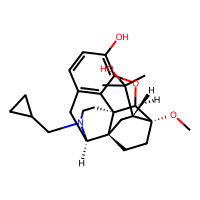

In [4]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES','mol_obj')
df

In [ ]:
df_mf = []

for mol in df['mol_obj']:
    # mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits= 512)
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2)
    fingerprint = morgan_gen.GetFingerprint(mol)
    arr = np.zeros((0,), dtype=np.int8)
    #convert the rdkit to vectors
    DataStructs.ConvertToNumpyArray(fingerprint, arr)
    df_mf.append(arr)

    MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

In [28]:
MF

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,502,503,504,505,506,507,508,509,510,511
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x16abe3c30>,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x16abe3e60>,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x16abe3ed0>,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x16acac970>,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x16acac040>,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x311992a40>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x311992ab0>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x311992b20>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x311992b90>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
MF_embedding = MF.drop(MF.columns[:4], axis=1)
MF_embedding

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# create an empty list
df_maccs = []

# run a for loop to iterate through each molecule
for mol in df['mol_obj']:
# generate bitvector object
  maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
# create an empty array
  arr = np.zeros((0,), dtype=np.int8)
# convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(maccs_bitvector,arr)
# append the array to the empty list
  df_maccs.append(arr)

MACCS = pd.concat([df, pd.DataFrame(df_maccs)], axis=1)
MACCS_embeddings = MACCS.drop(MACCS.columns[:4], axis=1)
MACCS_embeddings



In [6]:
MACCS


,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,157,158,159,160,161,162,163,164,165,166
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f6f0>,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f760>,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f840>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f290>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f8b0>,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x317351e00>,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x317351e70>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x317351ee0>,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x317351f50>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [7]:
MACCS_embeddings = MACCS.drop(MACCS.columns[:4], axis=1)
MACCS_embeddings

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
19230,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
19231,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
19232,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [8]:
# create an empty list
df_apf = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in df['mol_obj']:
  apf_bitvector = apgen.GetFingerprint(mol)


# convert the RDKit explicit vectors into numpy arrays
  arr = np.array(apf_bitvector)
  df_apf.append(arr)

APF = pd.concat([df, pd.DataFrame(df_apf)], axis=1)
APF_embedding = APF.drop(APF.columns[:4], axis=1)
APF_embedding.head()

In [9]:
APF

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f6f0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f760>,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f840>,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f290>,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f8b0>,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x317351e00>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x317351e70>,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x317351ee0>,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x317351f50>,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
APF_embedding = APF.drop(APF.columns[:4], axis=1)
APF_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_ttf = []
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in df['mol_obj']:
  ttf_bitvector = ttgen.GetFingerprint(mol)

  # convert the RDKit explicit vectors into numpy arrays
  arr = np.array(ttf_bitvector)
  df_ttf.append(arr)

TTF = pd.concat([df, pd.DataFrame(df_ttf)], axis=1)
TTF_embedding = TTF.drop(TTF.columns[:4], axis=1)
TTF_embedding
     

In [12]:
TTF.head()

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f6f0>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f760>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f840>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x15d06f290>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x15d06f8b0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# APF_embedding = APF.drop(APF.columns[:4], axis=1)
TTF_embedding = TTF.drop(TTF.columns[:4], axis=1)
TTF_embedding

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_pf = []
for mol in df['mol_obj']:
  pf_bitvector = PatternFingerprint(mol)
  arr = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(pf_bitvector,arr)
  df_pf.append(arr)

PF = pd.concat([df, pd.DataFrame(df_pf)], axis=1)
PF_embeddings = PF.drop(PF.columns[:4], axis =1)
PF_embeddings.head()

In [112]:
PF.head()

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7f1b0>,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7c510>,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7e180>,0,1,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7ef10>,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7ef80>,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [18]:
PF_embeddings = PF.drop(PF.columns[:4], axis =1)
PF_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [19]:
# Define the amino acid alphabet and one-hot encoding mapping
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode_sequence(seq):
    # Initialize zero matrix for the sequence length x 20 amino acids
    ohe = np.zeros((len(seq), len(amino_acids)), dtype=int)
    for i, aa in enumerate(seq):
        if aa in aa_to_int:
            ohe[i, aa_to_int[aa]] = 1
    return ohe.flatten()  # Flatten the array to make it 1D for each protein

# Apply one-hot encoding to each sequence and store in new column
df['Protein_OHE'] = df['Target Sequence'].apply(one_hot_encode_sequence)
protein_embedding = df['Protein_OHE']

# Display the first few rows of the DataFrame with the new column
# print(df[['Target Sequence', 'Protein_OHE']].head())

In [20]:
protein_embedding.head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
Name: Protein_OHE, dtype: object

In [103]:
# np.set_printoptions(threshold=np.inf)

# # Display the full content of the first few one-hot encoded arrays
# print(df['Protein_OHE'].iloc[1]) 

In [104]:
df

,SMILES,Target Sequence,Label,sFunction,1,2,3,4,5,6,...,200,201,202,203,204,205,206,207,208,209
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,[OUTPUT] This enzyme may degrade cohesive stru...,4.356094,4.356094,0.709426,0.709426,0.759604,239.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,[OUTPUT] Retinoic acid receptors bind to their...,10.534005,10.534005,0.259688,-0.912324,0.529573,300.442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,[OUTPUT] Catalyzes reduction of carbonyl-conta...,15.171732,15.171732,0.028414,-2.274490,0.195690,778.947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,NaN,10.288871,10.288871,0.207327,-0.628034,0.349961,406.482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,[OUTPUT] The regulatory subunit of the KCNMA1 ...,11.124475,11.124475,0.130320,-0.296192,0.484554,399.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,[OUTPUT] A cytochrome P450 monooxygenase invol...,10.320648,10.320648,0.192130,-0.552685,0.550757,123.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,[OUTPUT] Catalyzes the hydrolysis of fructose ...,12.797225,12.797225,0.013589,-4.099092,0.413630,480.329,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,[OUTPUT] The alpha-adrenergic receptor mediate...,6.204052,6.204052,0.690871,0.690871,0.809350,313.788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,[OUTPUT] The cell surface glycoprotein recepto...,12.714217,12.714217,0.051232,-0.426737,0.517327,403.483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,SMILES,Target Sequence,Label,mol_obj
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,
...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,

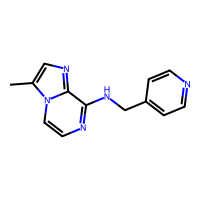
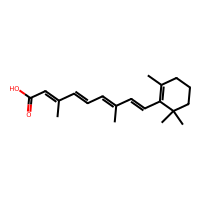
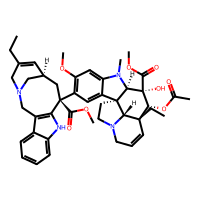
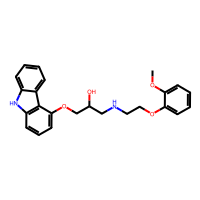
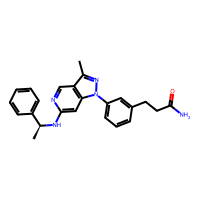
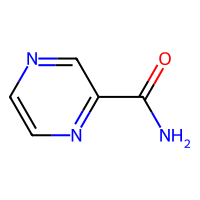
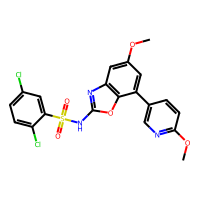
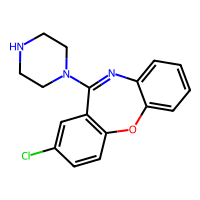
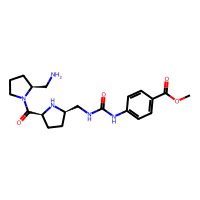
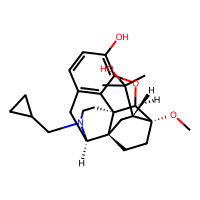

In [18]:
df

In [21]:
labels = df['Label']
labels

0        0
1        1
2        0
3        1
4        0
        ..
19229    1
19230    1
19231    1
19232    1
19233    1
Name: Label, Length: 19234, dtype: int64

In [23]:
df_embeddings = pd.concat([protein_embedding, MACCS_embeddings, TTF_embedding, PF_embeddings, APF_embedding, labels], axis=1)
df_embeddings.head()

In [24]:
df_embeddings.head()

,Protein_OHE,0,1,2,3,4,5,6,7,8,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Determine the number of columns for each embedding type
embedding_sizes = [256, 166, 128, 544, 512] # Replace with the actual sizes

# Create a new DataFrame to store the consolidated embeddings
consolidated_df = pd.DataFrame()

start = 0
for i, emb_size in enumerate(embedding_sizes):
    emb_type = ['protein', 'MACCS', 'TTF', 'PF', 'APF'][i]
    end = start + emb_size
    consolidated_df[f"{emb_type}_embedding"] = df_embeddings.iloc[:, start:end].sum(axis=1)
    start = end

# Add the labels column
consolidated_df['labels'] = df_embeddings.iloc[:, -1]

# Get the list of embedding types
embedding_types = ['protein', 'MACCS', 'TTF', 'PF', 'APF']

# Create a new DataFrame to store the consolidated embeddings
consolidated_df = pd.DataFrame()

for emb_type in embedding_types:
    # Concatenate all the columns for the current embedding type
    emb_columns = [col for col in df_embeddings.columns if col.startswith(f"{emb_type}_")]
    consolidated_df[f"{emb_type}_embedding"] = df_embeddings[emb_columns].sum(axis=1)

# Add the labels column
consolidated_df['labels'] = df_embeddings['labels']




print(consolidated_df.head())
print(f"Final DataFrame shape: {consolidated_df.shape}")

AttributeError: 'int' object has no attribute 'startswith'

In [ ]:
# Steps for this dataset
# drop missing values
# in the whole data set including the labels
# take the SMILES and convert to mols
# extract the five fingerprint, label the fingerprintmerge in a table with the protein_embedding
# check for correlation between these five fingerprint e,mbeddings and the protien embeddings
# drop higly correlated fingerprint
# split data into train, validation and test set
# save each dataset to be used during traing of the XGBOOST classifier and the MLP

# mODEL DEV and traing
# use packages to train the XGBOOST - Print the confusion matrix specifically Precison recall, f1 for each data set - and for each set of hyper params 
# use packages build MLP, print the accuracy and loss of the model, for each set of hyperparams
# Whcih model has the best perfroamnce and why
# which freatures are contributing most to the prediction and why?
# how significant is hyperprams in the predcitons of each model and why?
# does using a specfici fingerprint determine any signifcant changes in the model performance and why?
